Missing values before handling:
Booking_ID        0
Destination      27
Package_Price    20
Customer_Age     15
Rating           25
Review_Text      20
Travel_Date      10
dtype: int64

Number of duplicates before removal: 5


C:\Users\likit\AppData\Local\Temp\ipykernel_20648\39212697.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
C:\Users\likit\AppData\Local\Temp\ipykernel_20648\39212697.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

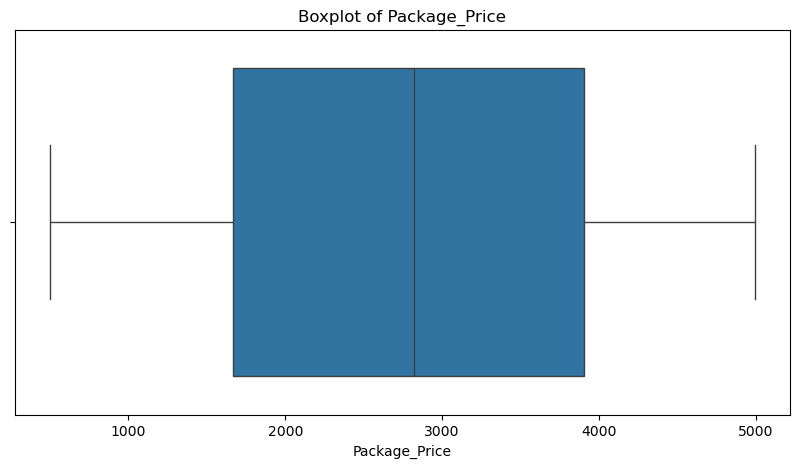

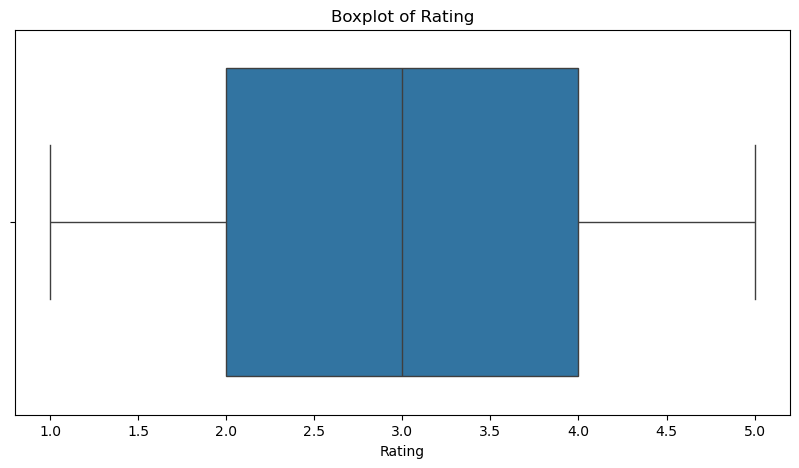


Dataset cleaned and saved as 'Cleaned_Travel_Reviews.csv'.


In [12]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('Day_18_Tours_and_Travels.csv')

# Step 2: Handle Missing Values
# Check for missing values
print("Missing values before handling:")
print(df.isnull().sum())

# Impute missing numerical values (Customer_Age and Rating)
df['Customer_Age'].fillna(df['Customer_Age'].median(), inplace=True)
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Handle missing Review_Text using NLP-based techniques
df['Review_Text'].fillna('No Review', inplace=True)

# Step 3: Detect and Remove Duplicates
# Check for duplicates
print("\nNumber of duplicates before removal:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Step 4: Handle Inconsistent Data
# Ensure Rating values are between 1 and 5
df['Rating'] = df['Rating'].clip(1, 5)

# Correct spelling inconsistencies in Destination (if any)
df['Destination'] = df['Destination'].str.strip().str.title()

# Step 5: Identify and Handle Outliers
# Boxplot for Package_Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Package_Price'])
plt.title('Boxplot of Package_Price')
plt.show()

# Boxplot for Rating
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.show()

# Apply transformation if necessary (e.g., log transformation for Package_Price)
df['Package_Price'] = np.log1p(df['Package_Price'])

# Step 6: Prepare Cleaned Data for Analysis
# Convert categorical data into numerical format (e.g., Destination)
df = pd.get_dummies(df, columns=['Destination'], drop_first=True)

# Step 7: Save the Final Cleaned Dataset
# Save the cleaned dataset
df.to_csv('Cleaned_Travel_Reviews.csv', index=False)

print("\nDataset cleaned and saved as 'Cleaned_Travel_Reviews.csv'.")


# In[ ]:




